# 1. Data Preparation

In [1]:
import pandas as pd
import numpy as np

In [ ]:
#Load the dataset:

In [3]:
file_path = "heart_disease.xlsx"
data =pd.read_excel(r"C:\Users\Sanjith\Desktop\Assignment 12\heart_disease.xlsx")

In [4]:
data.head()

,age,Age in years
0,Gender,"Gender ; Male - 1, Female -0"
1,cp,Chest pain type
2,trestbps,Resting blood pressure
3,chol,cholesterol measure
4,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; 0...


In [5]:
data.describe()

,age,Age in years
count,12,12
unique,12,12
top,Gender,"Gender ; Male - 1, Female -0"
freq,1,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           12 non-null     object
 1   Age in years  12 non-null     object
dtypes: object(2)
memory usage: 324.0+ bytes


# 2. Exploratory Data Analysis (EDA)

In [7]:
print(data.isnull().sum())

age             0
Age in years    0
dtype: int64


In [9]:
numeric_data = data.select_dtypes(include=['number'])

In [11]:
print(data.columns)

Index(['age', 'Age in years'], dtype='object')


In [18]:
print(data.columns)

Index(['age', 'Age in years'], dtype='object')


In [19]:
column_name = 'ActualColumnName'

In [20]:
data.columns = data.columns.str.strip()

In [22]:
print(data.columns)

Index(['age', 'Age in years'], dtype='object')


In [23]:
import pandas as pd

# Example DataFrame
data = pd.DataFrame({
    'ActualColumnName': ['age', 'Age in years']
})

In [24]:
data['ActualColumnName'] = pd.to_numeric(data['ActualColumnName'], errors='coerce')

In [26]:
print(data)

   ActualColumnName
0               NaN
1               NaN


array([[<Axes: title={'center': 'ActualColumnName'}>]], dtype=object)

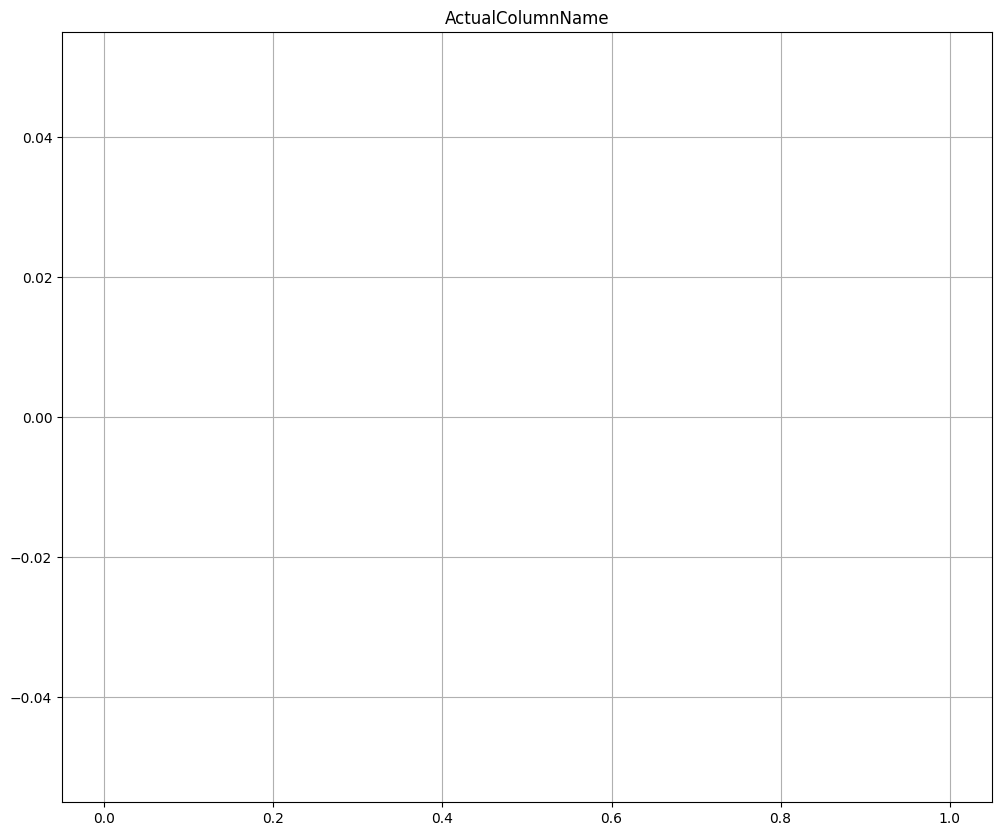

In [27]:
data.hist(figsize=(12, 10))

In [30]:
data = pd.DataFrame({
    'Values': [10, 20, 20, 30, 40, 40, 40, 50, 50, 60]
})

<Axes: >

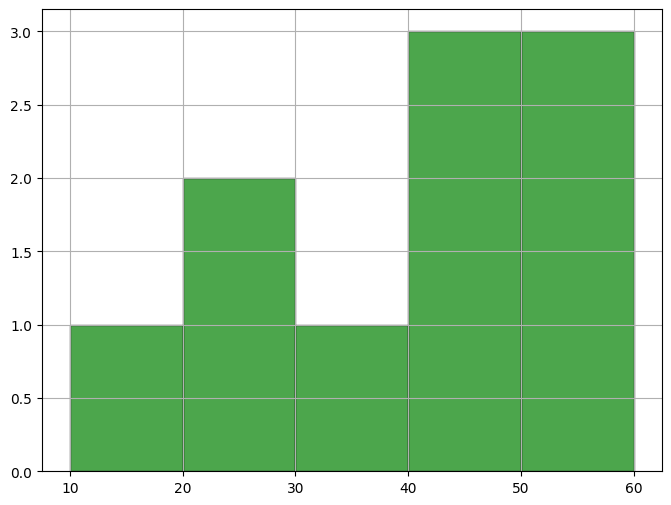

In [32]:
data['Values'].hist(bins=5, figsize=(8, 6), color='green', alpha=0.7, edgecolor='black')

In [36]:
import matplotlib.pyplot as plt

In [37]:
data = pd.DataFrame({
    'Values': [10, 20, 20, 30,30, 40, 40, 40, 50, 50, 60]
})

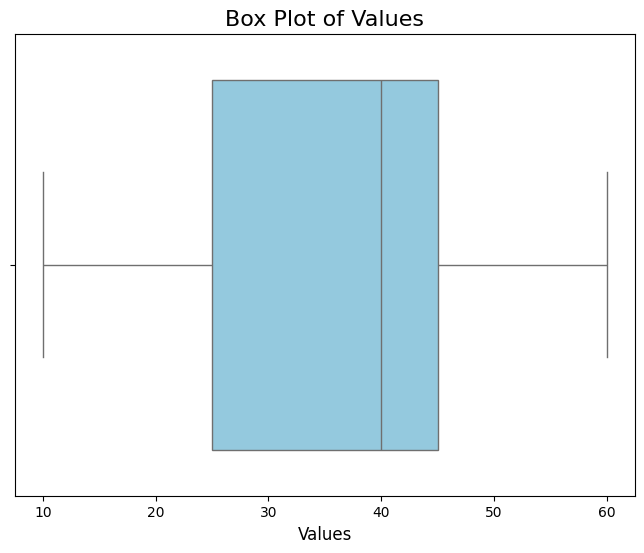

In [38]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Values'], color='skyblue')
plt.title('Box Plot of Values', fontsize=16)
plt.xlabel('Values', fontsize=12)
plt.show()

<Axes: >

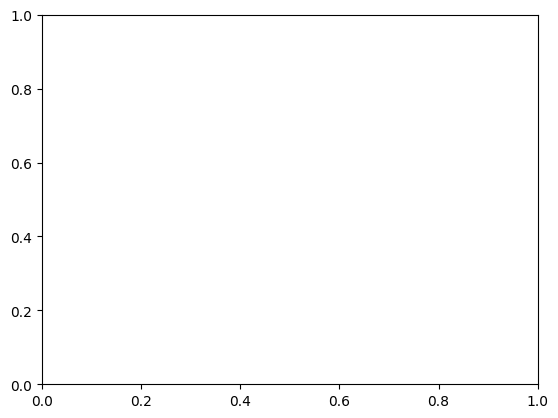

In [14]:
import seaborn as sns
sns.boxplot(data=data)

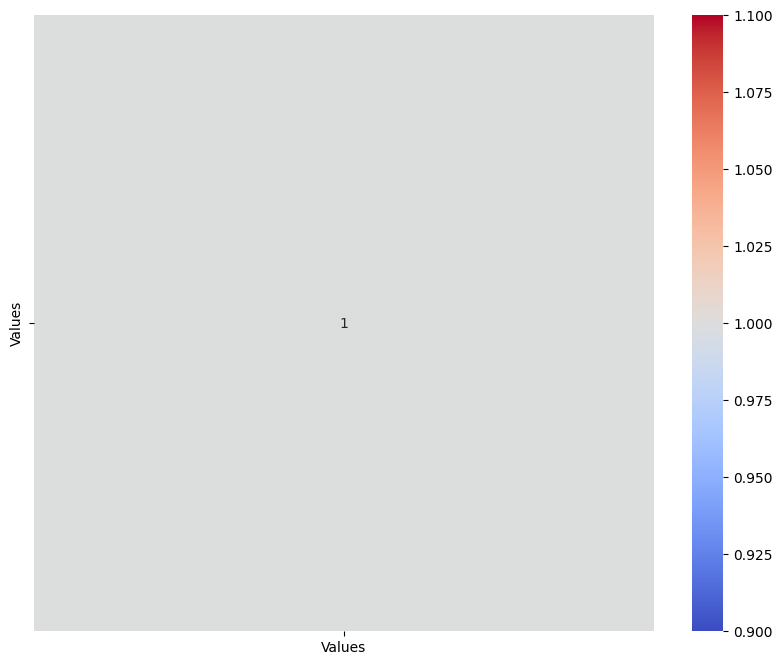

In [39]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

# 3. Feature Engineering

In [40]:
data.fillna(data.mean(), inplace=True)

In [41]:
data = pd.get_dummies(data, drop_first=True)

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(data)
data = pd.DataFrame(scaled_features, columns=data.columns)

# 4. Decision Tree Classification

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
data = pd.DataFrame({
    'Feature1': [1, 2, 3, 4, 5],
    'Feature2': [10, 20, 30, 40, 50],
    'ActualColumnName': [0, 1, 0, 1, 0]
})

In [47]:
# Splitting features and target
X = data.drop('ActualColumnName', axis=1)
y = data['ActualColumnName']


In [48]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train:")
print(X_train)
print("\nX_test:")
print(X_test)
print("\ny_train:")
print(y_train)
print("\ny_test:")
print(y_test)

X_train:
   Feature1  Feature2
4         5        50
2         3        30
0         1        10
3         4        40

X_test:
   Feature1  Feature2
1         2        20

y_train:
4    0
2    0
0    0
3    1
Name: ActualColumnName, dtype: int64

y_test:
1    1
Name: ActualColumnName, dtype: int64


In [49]:
from sklearn.model_selection import train_test_split

X = data.drop('ActualColumnName', axis=1)  # Replace 'target_column' with the actual name
y = data['ActualColumnName']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [54]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

In [55]:
y_pred = clf.predict(X_test)

In [56]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.0


In [76]:
from sklearn.metrics import classification_report

In [86]:
print(np.unique(y_test))

[1]


In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
if len(np.unique(y_test)) > 1:
    print(f"ROC-AUC: {roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])}")

In [89]:
 print("ROC-AUC score cannot be computed as y_test contains only one class.")

ROC-AUC score cannot be computed as y_test contains only one class.


# 5. Hyperparameter Tuning

In [62]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}


In [69]:
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=2, scoring='accuracy')

In [71]:
grid_search.fit(X_train, y_train)

C:\Users\Sanjith\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


GridSearchCV(cv=2, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [72]:
best_model = grid_search.best_estimator_

In [ ]:
# 5. Hyperparameter Tuning

In [91]:
y_pred_best = best_model.predict(X_test)

In [92]:
print(f"Optimized Accuracy: {accuracy_score(y_test, y_pred_best)}")

Optimized Accuracy: 0.0


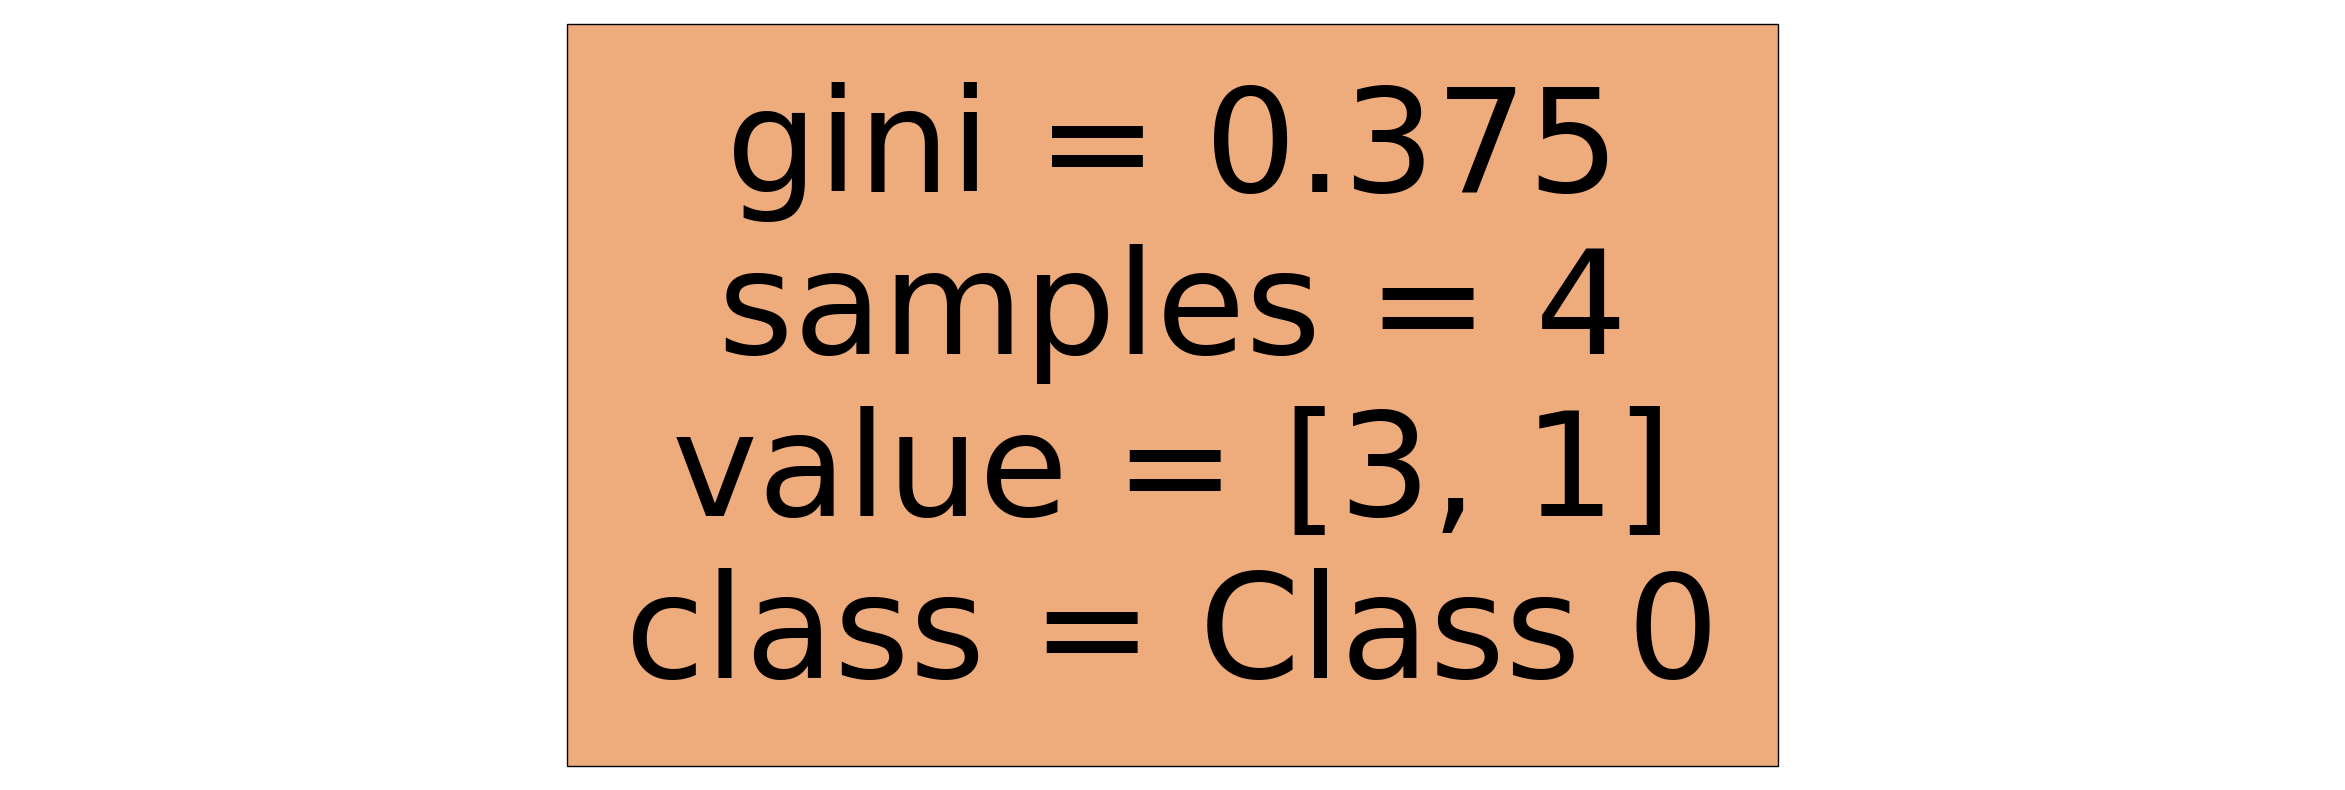

In [84]:
from sklearn.tree import plot_tree

plt.figure(figsize=(30, 10))
plot_tree(best_model, feature_names=X.columns, class_names=['Class 0', 'Class 1'], filled=True)
plt.show()

In [85]:
importances = best_model.feature_importances_
feature_importances = pd.DataFrame(importances, index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
print(feature_importances)

          Importance
Feature1         0.0
Feature2         0.0


In [ ]:
# 1. Common Hyperparameters of Decision Tree Models and Their Effects
Hyperparameter	Description	Effect on Model Performance
max_depth	Maximum depth of the tree.	Controls overfitting: Smaller depth reduces overfitting but may cause underfitting.
min_samples_split	Minimum number of samples required to split a node.	Larger values make the tree more conservative, reducing overfitting.
min_samples_leaf	Minimum number of samples required in a leaf node.	Prevents the tree from creating nodes with very few samples, making it less likely to overfit.
max_features	Maximum number of features considered for splitting a node.	Reducing the number of features can increase variance but decreases complexity, helping prevent overfitting.
max_leaf_nodes	Maximum number of leaf nodes in the tree.	Limits the growth of the tree to reduce complexity and overfitting.
criterion	Function to measure the quality of a split (gini or entropy).	Affects how splits are decided: - gini (default) is faster, while entropy gives more information-theoretic splitting.
splitter	The strategy for splitting at each node (best or random).	best: Selects the best split based on the criterion. random: Introduces randomness to prevent overfitting in small datasets.
ccp_alpha (pruning)	Complexity parameter for cost complexity pruning.	Helps simplify the tree by pruning unnecessary branches, reducing overfitting.

In [ ]:
# 2. Difference Between Label Encoding and One-Hot Encoding
Definition	Converts categorical values into integer labels.	Converts each category into a binary vector.
Representation	Assigns a unique integer to each category.	Creates separate binary columns for each category.
Output Example	For categories: ['Red', 'Blue', 'Green']	For categories: ['Red', 'Blue', 'Green']
→ [0, 1, 2]	→ [1, 0, 0], [0, 1, 0], [0, 0, 1]
Use Case	Used for ordinal data where order matters.	Used for nominal data where no order exists.
Impact on Model	May introduce unintended ordinal relationships.	Avoids ordinal relationships, but increases dimensions.
Disadvantage	Can mislead models into interpreting relationships in data.	High dimensionality for datasets with many categories.
